NLP_df_labeled 
ggl sheet: NLP_df_unlimit_final_more_for_upload     


In [ ]:
'''git remote add origin https://github.com/knnatt/Twitter_NLP
git add twitter-gpt.ipynb        
git commit -m "testing first repository"      
change branch->  git checkout -b TUNA-TUNING-VISUAL
this file is modified after lstm_v.sukree_keras_relevance_gridSearch and run with hyper parameter from Natt_boom_boom.ipynb

'''

In [7]:
'''! pip install pandas
! pip install keras
! pip install pythainlp
! pip install scikit-learn
! pip install numpy
! pip install matplotlib
! pip install seaborn'''


'! pip install pandas\n! pip install keras\n! pip install pythainlp\n! pip install scikit-learn\n! pip install numpy\n! pip install matplotlib\n! pip install seaborn'

In [2]:
import os
import re
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from pythainlp.tokenize import word_tokenize
#from sklearn.metrics import confusion_matrix
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize

In [3]:
def stopwords_rm(text):
    stopwords = set(thai_stopwords())
    stopwords.update(["nan", "-", "_", "", " ", "฿" ,"ค่ะ", "ครับ", "จ้า"])  # Add more stopwords as needed

    # Remove stopwords from the text
    cleaned_text = ' '.join(word for word in text.split() if word not in stopwords)
    return cleaned_text


def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def normie(df):
    print('cleaning . . .')
    i = 0 #row number
    df['cleaned1'] = ''
    for row in df['cleaned']:
        clean = ''
        j = row.split(' ') #j is array of string
        for word in j:
            clean = clean + ' ' + normalize(word) #spell(word)[0] #correct(word)
        df['cleaned1'].iloc[i] = clean
        i += 1
    print('done cleaning by normalization')
    return df['cleaned1']
def alone(df):
    print('Are you alone?')
    i = 0 #row number
    df['cleaned1'] = ''
    for row in df['cleaned']:
        words = row.split() #j is array of string
        cleaned = [word for word in words if len(word) > 1]
        cleaned_string = " ".join(cleaned)
        df['cleaned1'].iloc[i] = cleaned_string
        i += 1
    print('done cleaning alone')
    return df['cleaned1']


In [4]:
df_1 = pd.read_csv("./df_y4s2_final_new.csv")
#df_1 = df_1.dropna(subset='mentioned_location') #new jet

In [5]:
df_1['relevant'].value_counts() 

relevant
False    3327
True      271
Name: count, dtype: int64

In [6]:
df_all = pd.read_csv("./df_y4s2_v1_Natt48.csv") #have chad chat 48 true entries
df_all1 = pd.concat([df_1,df_all])
df_all1['Chadchad'] = df_all1['Chadchad'].fillna('no')
df_all1 = df_all1.drop_duplicates(subset='tweet_text', keep='last')
df_a = df_all1


In [7]:
df_a['relevant'].value_counts() 

relevant
False    3334
True      312
Name: count, dtype: int64

random drop false num_drop(3008 data entries) for resolve imbalance data

In [8]:
num_drop = int(df_a[df_a['relevant'] == False].shape[0]) - int(df_a[df_a['relevant'] == True].shape[0])
np.random.seed(int(time.time()))
false_rows = df_a[df_a['relevant'] == False]
rows_to_keep = false_rows.sample(n=312, random_state=42) 

df_dropped = df_a[df_a['relevant'] != False]
df_a = pd.concat([df_dropped,rows_to_keep])
df_a['relevant'].value_counts() #balanced 

relevant
True     312
False    312
Name: count, dtype: int64

In [9]:
df_a['split_text'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm",keep_whitespace=False), axis=1) #use this
df_a['combined'] = [' '.join(lst) for lst in df_a['split_text']]
df_a['cleaned'] = df_a['combined'].apply(deEmojify)
df_a['cleaned'] = df_a['cleaned'].apply(stopwords_rm) #use in X
#df_a['cleaned'] = normie(df_a)
df_a['cleaned'] = alone(df_a)
df_a['split_cleaned'] = df_a.apply(lambda row: word_tokenize(row['cleaned'],engine="newmm",keep_whitespace=False), axis=1) #use in counting words

#newmm cuts better than nemm-safe ศร, ีฯ ค่,ะ #attacut is virus
#try other engine or break larger, add space in between  
#df_a['split_text2'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm-safe",keep_whitespace=False), axis=1)'''


Are you alone?
done cleaning alone


C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\415578056.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] = cleaned_string
C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\415578056.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] = cleaned_string
C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\415578056.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] 

https://pythainlp.github.io/dev-docs/api/tokenize.html

In [10]:
df_a['relevance_nlp'] = df_a['relevant'].apply(lambda x: 'relevant' if x else 'not relevant')
df_a = df_a.dropna(subset=['tweet_text'])
df_a['contain_area'],df_a['contain_good'] = '2','2'
for i in range(df_a['split_cleaned'].shape[0]):
    if 'ดี' in df_a['split_cleaned'].iloc[i]:
        df_a['contain_good'].iloc[i] = '1'
    else:
        df_a['contain_good'].iloc[i] = '0'

for i in range(df_a['split_cleaned'].shape[0]):
    if 'พื้นที่' in df_a['split_cleaned'].iloc[i]:
        df_a['contain_area'].iloc[i] = '1'
    else:
        df_a['contain_area'].iloc[i] = '0'
df_a = df_a.dropna(subset=['tweet_text'])

C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\3348223842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] = '0'
C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\3348223842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] = '0'
C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\3348223842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] = '0

In [11]:
df_a['word_length'] = df_a['split_cleaned'].str.len()

In [12]:
df_a['word_length'].sort_values(ascending=False) 

2768    132
2770     93
2783     79
2797     76
2771     76
       ... 
1338      4
409       4
2765      4
127       3
2758      2
Name: word_length, Length: 624, dtype: int64

In [13]:
df_a


,index,username,tweet_id,tweet_text,translated_text,org_step_1,org_step_2,relevant,category,query,...,Chadchad,split_text,combined,cleaned,cleaned1,split_cleaned,relevance_nlp,contain_area,contain_good,word_length
2769,2519,SersTytmissmay,1.670000e+18,ก็ถ้าไม่อยากจ่ายค่าปรับ 2000 ก็หยุดเถอะ ทุกวัน...,"Well, if you don't want to pay the 2000 baht f...",สนง.ตำรวจแห่งชาติ,สนง.ตำรวจแห่งชาติ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ดิน...",...,no,"[ก็, ถ้า, ไม่, อยาก, จ่าย, ค่าปรับ, 2000, ก็, ...",ก็ ถ้า ไม่ อยาก จ่าย ค่าปรับ 2000 ก็ หยุด เถอะ...,จ่าย ค่าปรับ 2000 หยุด เลิกงาน เดิน กลับบ้าน พ...,จ่าย ค่าปรับ 2000 หยุด เลิกงาน เดิน กลับบ้าน พ...,"[จ่าย, ค่าปรับ, 2000, หยุด, เลิกงาน, เดิน, กลั...",relevant,0,0,22
2797,2548,yoktipp3,1.670000e+18,เห็นรถใหญ่ปีนขึ้นมาจอดบนฟุตบาท เขตเพิ่งทำพื้นแ...,Saw a large car climb up and park on the sidew...,สนง.ตำรวจแห่งชาติ,สนง.ตำรวจแห่งชาติ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ดิน...",...,no,"[เห็น, รถ, ใหญ่, ปีน, ขึ้น, มา, จอด, บน, ฟุตบา...",เห็น รถ ใหญ่ ปีน ขึ้น มา จอด บน ฟุตบาท เขต เพิ...,รถ ปีน จอด ฟุตบาท เขต ทำ พื้น แตก แผ่น มอไซด์ ...,รถ ปีน จอด ฟุตบาท เขต ทำ พื้น แตก แผ่น มอไซด์ ...,"[รถ, ปีน, จอด, ฟุตบาท, เขต, ทำ, พื้น, แตก, แผ่...",relevant,0,0,15
2883,2635,sn_inmymind,1.670000e+18,ฟุตบาทเพชรบุรีมุ่งหน้าอโศกเลยจ่ะ ฉันเดินไปทำงา...,Phetchaburi footpath heading towards Asoke. I ...,สนง.ตำรวจแห่งชาติ,สนง.ตำรวจแห่งชาติ,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""อนุ...",...,no,"[ฟุตบาท, เพชรบุรี, มุ่งหน้า, อโศก, เลย, จ่ะ, ฉ...",ฟุตบาท เพชรบุรี มุ่งหน้า อโศก เลย จ่ะ ฉัน เดิน...,ฟุตบาท เพชรบุรี มุ่งหน้า อโศก จ่ะ เดิน ทำงาน ค...,ฟุตบาท เพชรบุรี มุ่งหน้า อโศก จ่ะ เดิน ทำงาน ค...,"[ฟุตบาท, เพชรบุรี, มุ่งหน้า, อโศก, จ่ะ, เดิน, ...",relevant,0,0,33
2916,2668,PuPoPu_error,1.670000e+18,ไปเดินเที่ยว เห็นเลยค่ะ ว่าสกปรก ถนนบรรทัดทอง...,Went for a walk and saw that Banthat Thong Roa...,สนง.โยธา,สนง.โยธา,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",...,no,"[ไป, เดินเที่ยว, เห็น, เลย, ค่ะ, ว่า, สกปรก, ถ...",ไป เดินเที่ยว เห็น เลย ค่ะ ว่า สกปรก ถนน บรรทั...,เดินเที่ยว สกปรก ถนน บรรทัด ทอง เยาวราช เส้น ร...,เดินเที่ยว สกปรก ถนน บรรทัด ทอง เยาวราช เส้น ร...,"[เดินเที่ยว, สกปรก, ถนน, บรรทัด, ทอง, เยาวราช,...",relevant,0,0,25
2958,2710,jerry24hrs,1.670000e+18,มันไม่ทำกรวยอะไรหรอก เจริญกรุงทั้งเส้น วางสองฝ...,It doesn't cone anything. Charoen Krung the wh...,สนง.โยธา,สนง.โยธา,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""เจร...",...,no,"[มัน, ไม่, ทำ, กรวย, อะไร, หรอก, เจริญ, กรุง, ...",มัน ไม่ ทำ กรวย อะไร หรอก เจริญ กรุง ทั้ง เส้น...,ทำ กรวย หรอก เจริญ กรุง เส้น วาง สอง ฝั่ง ฟุตบ...,ทำ กรวย หรอก เจริญ กรุง เส้น วาง สอง ฝั่ง ฟุตบ...,"[ทำ, กรวย, หรอก, เจริญ, กรุง, เส้น, วาง, สอง, ...",relevant,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,1421,yujinxosaka,1.700000e+18,ไปกทมล่าสุดเดินวันละสองหมื่นก้าว บวกลากกระเป๋า...,"Recently went to Bangkok and walked 20,000 ste...",NaN,NaN,False,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",...,no,"[ไป, กทม, ล่าสุด, เดิน, วัน, ละ, สอง, หมื่น, ก...",ไป กทม ล่าสุด เดิน วัน ละ สอง หมื่น ก้าว บวก ล...,กทม เดิน สอง หมื่น ก้าว บวก ลาก กระเป๋า ลาก ทา...,กทม เดิน สอง หมื่น ก้าว บวก ลาก กระเป๋า ลาก ทา...,"[กทม, เดิน, สอง, หมื่น, ก้าว, บวก, ลาก, กระเป๋...",not relevant,0,0,27
2030,1775,AFNCThailand,1.690000e+18,กทม. ขยาย 10 จุดใช้ AI ตรวจจับผู้ขับขี่จักรยาน...,Bangkok expands 10 points to use AI to detect ...,NaN,NaN,False,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",...,no,"[กทม., ขยาย, 10, จุด, ใช้, AI, ตรวจจับ, ผู้ขับ...",กทม. ขยาย 10 จุด ใช้ AI ตรวจจับ ผู้ขับขี่ จักร...,กทม. ขยาย 10 จุด AI ตรวจจับ ผู้ขับขี่ จักรยานย...,กทม. ขยาย 10 จุด AI ตรวจจับ ผู้ขับขี่ จักรยานย...,"[กทม., ขยาย, 10, จุด, AI, ตรวจจับ, ผู้ขับขี่, ...",not relevant,0,0,28
2380,2128,jerry24hrs,1.680000e+18,ผลงานช้าไม่เป็นไร ใส่ใจไลฟ์สด รถเข็นล้นฟุตบาท ...,Slow work is okay. Pay attention to the live b...,Na

Optuna

In [14]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
#from scikeras.wrappers.scikit_learn import KerasClassifier #comes with GridSearch
from scikeras.wrappers import KerasClassifier
from sklearn.base import BaseEstimator
from keras import backend as K
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, SpatialDropout1D, Dense, Bidirectional, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam


MAX_WORDS = 3500  # Memorized words
MAX_SEQUENCE_LENGTH = 132
#EMBEDDING_DIM = 100
#epochs = 50
#batch_size = 32

tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df_a.cleaned.values)
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(df_a.cleaned.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# Addding Pau anal---------

contain_good = df_a['contain_good'].to_numpy()
good_reshaped = np.reshape(contain_good, (contain_good.shape[0], 1))
good_reshaped = [int(x) for n in range(int(df_a.shape[0]))for x in good_reshaped[n][0]] #list in int 
np_good = np.array(good_reshaped)
good_reshaped = np.reshape(np_good, (np_good.shape[0], 1))

contain_area = df_a['contain_area'].to_numpy()
area_reshaped = np.reshape(contain_area, (contain_area.shape[0], 1))
area_reshaped = [int(x) for n in range(int(df_a.shape[0]))for x in area_reshaped[n][0]] #list in int 
np_area = np.array(area_reshaped)
area_reshaped = np.reshape(np_good, (np_good.shape[0], 1))

# Use np.hstack to append new column to the right
X = np.hstack((X, good_reshaped))
X = np.hstack((X, area_reshaped))

# Ending Pau anal------

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df_a['relevance_nlp'].values)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)


## Save the training inputs

In [ ]:
import pickle

# Save X_train, X_test, y_train, y_test
with open('./train_test_data.pkl', 'wb') as f:
    pickle.dump(X_train, X_test, Y_train, Y_test, f)


## Optuna

Jet Optuna training: 
Best trial:
  Value:  0.7628665883382865
  Params:  {'dropout_rate': 0.058795593243084476, 'dropout_rate2': 0.09787324634987318, 'LSTM_units': 128, 'EMBEDDING_DIM': 150, 'learning_rate': 0.0004042055830540087}

In [17]:
import optuna
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.metrics import fbeta_score, make_scorer
from keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM
import numpy as np

# Define your data-specific constants
MAX_WORDS = 3500
MAX_SEQUENCE_LENGTH = 132

def create_model(trial):
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3)
    dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1) 
    LSTM_units = trial.suggest_categorical('LSTM_units', [64, 128, 256])
    EMBEDDING_DIM = trial.suggest_categorical('EMBEDDING_DIM', [100, 150, 200])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-3)
    print('create mod: d_rate', dropout_rate, 'd_rate2 ', dropout_rate2, 'LSTM ', LSTM_units, 'dim ', EMBEDDING_DIM, 'lr ', learning_rate)

    model = Sequential()
    model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Bidirectional(LSTM(LSTM_units, dropout=dropout_rate ,return_sequences=True)))
    model.add(Dropout(dropout_rate2)) 
    model.add(Bidirectional(LSTM(int(LSTM_units / 2))))
    model.add(Dropout(dropout_rate2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
    return model

class CustomKerasClassifier(BaseEstimator):
    def __init__(self, trial=None, **kwargs):
        self.trial = trial
        self.kwargs = kwargs

    def fit(self, X, Y):
        model = create_model(self.trial)
        model.fit(X, Y, **self.kwargs)
        self.model = model
        return self

    def predict(self, X):
        predictions = self.model.predict(X)
        binary_predictions = [[1 if value[0] > 0.5 else 0] for value in predictions]
        return binary_predictions

# Objective function for Optuna
def objective(trial):
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3) #value should be from small to large only
    dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1) 
    LSTM_units = trial.suggest_categorical('LSTM_units', [64, 128, 256])
    EMBEDDING_DIM = trial.suggest_categorical('EMBEDDING_DIM', [100, 150, 200])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-3)
    print('objectiving')

    model = CustomKerasClassifier(trial=trial)
    f1 = make_scorer(fbeta_score, beta=1)
    print('result score f1 fuc', -np.mean(cross_val_score(model, X_train, Y_train, cv=3, scoring=f1)))
    return np.mean(cross_val_score(model, X_train, Y_train, cv=3, scoring=f1))

# Study configuration
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1) #edit the running here to 50 or so

# Print results
print("Best trial:")
best_trial = study.best_trial
print("  Value: ", best_trial.value)
print("  Params: ", study.best_params)


c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-04-25 14:02:52,472] A new study created in memory with name: no-name-7b5cd435-585e-435d-9536-0dde3167217a
C:\Users\natkn\AppData\Local\Temp\ipykernel_20048\2556095107.py:50: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3) #value should be from small to large only
C:\Users\natkn\AppData\Local\Temp\ipykernel_20048\2556095107.py:51: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  d

objectiving
create mod: d_rate 0.22551912661137907 d_rate2  0.09034077397250363 LSTM  64 dim  150 lr  0.0007412097155187079
6/6 [==============================] - 2s 35ms/step
create mod: d_rate 0.22551912661137907 d_rate2  0.09034077397250363 LSTM  64 dim  150 lr  0.0007412097155187079


C:\Users\natkn\AppData\Local\Temp\ipykernel_20048\2556095107.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.05, 0.3)
C:\Users\natkn\AppData\Local\Temp\ipykernel_20048\2556095107.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.05, 0.1)
C:\Users\natkn\AppData\Local\Temp\ipykernel_20048\2556095107.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-3)
[W 2024-04-

KeyboardInterrupt: 

## Loading the back-up values for train-test

In [3]:
import pickle

# Load the data from the file
with open('./train_test_data.pkl', 'rb') as f:
    X_train, X_test, Y_train, Y_test = pickle.load(f)

## Real training bi-LSTM

Put the best result trail from optuna in

In [5]:
from keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM, Layer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.optimizers import Adam

MAX_WORDS = 3500
MAX_SEQUENCE_LENGTH = 134 #including Pau

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    print(2 * ((precision * recall) / (precision + recall + K.epsilon())))
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def create_model(dropout_rate, dropout_rate2, LSTM_units, EMBEDDING_DIM, learning_rate):  
    model = Sequential()
    model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Bidirectional(LSTM(LSTM_units, dropout = dropout_rate ,return_sequences=True)))
    model.add(Dropout(dropout_rate2)) 
    model.add(Bidirectional(LSTM(int(LSTM_units / 2))))
    model.add(Dropout(dropout_rate2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
    return model

early_stopping1 = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
early_stopping2 = EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)

model = create_model(0.058795593243084476, 0.09787324634987318, 128, 150,  0.0004042055830540087) #0.12046325878870909,0.083088237668143,256,150,4.6059257159255764e-05
history = model.fit(X_train, Y_train, epochs=25, batch_size=32,  verbose=1, callbacks=[early_stopping1,early_stopping2]) #validation_split=0.2,

Epoch 1/25
16/16 [==============================] - 15s 379ms/step - loss: 0.6931 - accuracy: 0.4990
Epoch 2/25
16/16 [==============================] - 6s 384ms/step - loss: 0.6761 - accuracy: 0.5952
Epoch 3/25
16/16 [==============================] - 6s 394ms/step - loss: 0.5565 - accuracy: 0.7856
Epoch 4/25
16/16 [==============================] - 6s 367ms/step - loss: 0.2557 - accuracy: 0.9419
Epoch 5/25
16/16 [==============================] - 6s 406ms/step - loss: 0.1431 - accuracy: 0.9599
Epoch 6/25
16/16 [==============================] - 6s 385ms/step - loss: 0.0949 - accuracy: 0.9739
Epoch 7/25
16/16 [==============================] - 6s 375ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 8/25
16/16 [==============================] - 5s 327ms/step - loss: 0.0278 - accuracy: 0.9940
Epoch 9/25
16/16 [==============================] - 6s 344ms/step - loss: 0.0139 - accuracy: 0.9980
Epoch 10/25
16/16 [==============================] - 5s 336ms/step - loss: 0.0059 - accuracy: 1.000

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
evaluation = model.evaluate(X_train, Y_train)

loss = evaluation[0]
accuracy = evaluation[1]

# Print evaluation metrics
print('Test set evaluate\n  Loss: {:0.3f}\n  Accuracy Score: {:0.3f}'.format(loss, accuracy))

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(Y_test, y_pred_binary, average='weighted')
recall = recall_score(Y_test, y_pred_binary, average='weighted')
f1_metric = (2 * precision * recall)/(precision + recall)

# Print precision, recall, and F1 score
print('Precision: {:0.3f}\nRecall: {:0.3f}\nF1 Score: {:0.3f}\n'.format(precision, recall, f1_metric))

 1/16 [>.............................] - ETA: 2s - loss: 0.0063 - accuracy: 1.0000

16/16 [==============================] - 2s 136ms/step - loss: 0.0123 - accuracy: 0.9980
Test set evaluate
  Loss: 0.012
  Accuracy Score: 0.998
4/4 [==============================] - 0s 117ms/step
Precision: 0.753
Recall: 0.720
F1 Score: 0.736



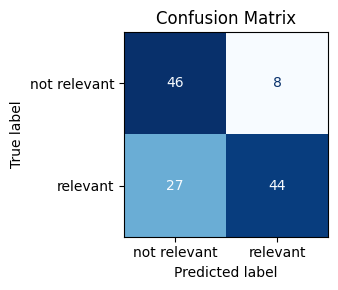

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not relevant','relevant'])
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Confusion Matrix') #put title before to avoid cropping
plt.gcf().set_size_inches(4, 3) 

# Prevent cropping
plt.tight_layout()

#plt.savefig('./img/confusion_relevant_ori_trafbal_pauOLD.png') # Save the figure before showing
plt.show()

## Save the model 

In [27]:
# Save the best model
model.save('./model/relevant_arch_hyper.h5')

model_json = model.to_json()
with open("./model/relevant_arch_hyper.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('./model/relevant_weight_hyper.h5')

c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# Print the contents of the saved JSON file for verification
with open("./model/relevant_arch_hyper.json", "r") as json_file:
    saved_json_content = json_file.read()
    print("Contents of saved JSON file:")
    print(saved_json_content)

Contents of saved JSON file:
{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 134], "dtype": "float32", "sparse": false, "ragged": false, "name": "embedding_1_input"}}, {"class_name": "Embedding", "config": {"name": "embedding_1", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 134], "input_dim": 3500, "output_dim": 200, "embeddings_initializer": {"module": "keras.initializers", "class_name": "RandomUniform", "config": {"minval": -0.05, "maxval": 0.05, "seed": null}, "registered_name": null}, "embeddings_regularizer": null, "activity_regularizer": null, "embeddings_constraint": null, "mask_zero": false, "input_length": 134}}, {"class_name": "Bidirectional", "config": {"name": "bidirectional_2", "trainable": true, "dtype": "float32", "layer": {"module": "keras.layers", "class_name": "LSTM", "config": {"name": "lstm_2", "trainable": true, "dtype": "float32", "return_sequences"

## Use the model

In [1]:
from keras.models import model_from_json

with open("./model/relevant_arch_hyper.json", "r") as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)

#model = model_from_json('./model/relevant_arch_hyper.json')
model.load_weights('./model/relevant_weight_hyper.h5') 

In [2]:
from tensorflow.keras import Model

feature_extraction_model = Model(inputs=model.input, outputs=model.layers[-2].output) #feature before dense(last layer)
feature_train = feature_extraction_model.predict(X_train) 
feature_test = feature_extraction_model.predict(X_test)  

print('feature_train',feature_train.shape)

NameError: name 'X_train' is not defined

## Extract feature of test model

In [28]:
from tensorflow.keras import Model

feature_extraction_model = Model(inputs=model.input, outputs=model.layers[-2].output) #feature before dense(last layer)
feature_test = feature_extraction_model.predict(X_test)  
print('feature_test',feature_test.shape)

4/4 [==============================] - 3s 107ms/step
feature_test (125, 128)


## SVC tuning


In [ ]:
import optuna
from sklearn.svm import SVC
from sklearn.metrics import f1_score

def objective(trial):
    # Define search space for hyperparameters
    C = trial.suggest_loguniform('C', 1e-10, 1e10)
    gamma = trial.suggest_loguniform('gamma', 1e-10, 1e10)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    
    # Initialize SVC with hyperparameters
    svc = SVC(C=C, gamma=gamma, kernel=kernel)
    
    # Evaluate SVC model using cross-validation
    f1_scores = cross_val_score(svc, feature_train, Y_train, cv=5, scoring='f1_weighted')
    f1 = f1_scores.mean()
    
    return f1

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters and F1 score
best_params = study.best_params
best_f1 = study.best_value


In [31]:
import optuna
from sklearn.svm import SVC
from sklearn.metrics import f1_score


# Define objective function for Optuna
def objective(trial):
    # Define search space for hyperparameters
    C = trial.suggest_loguniform('C', 1e-10, 1e10)
    gamma = trial.suggest_loguniform('gamma', 1e-10, 1e10)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    
    # Initialize SVC with hyperparameters
    svc = SVC(C=C, gamma=gamma, kernel=kernel)
    
    # Train and evaluate SVC model
    svc.fit(feature_train, Y_train)
    y_pred = svc.predict(feature_test)
    f1 = f1_score(Y_test, y_pred, average='weighted')


    return f1

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100) #30

# Get the best hyperparameters and F1 score
best_params = study.best_params
best_f1 = study.best_value

print("Best F1 Score:", best_f1)
print("Best Parameters:", best_params)


[I 2024-04-30 15:02:48,073] A new study created in memory with name: no-name-75051bfe-8090-400d-8c1b-0e9df364c1e2
C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\648531972.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-10, 1e10)
C:\Users\natkn\AppData\Local\Temp\ipykernel_3820\648531972.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-10, 1e10)
[I 2024-04-30 15:02:48,115] Trial 0 finished with value: 0.26064804469273745 and parameters: {'C': 2.325256359980876e-09, 'gamma': 187656.69398716243, 'kernel': 'linear'}. Best is trial 0 with value: 0.26064804469273745.
C:\Users\natkn\App

In [30]:
svc = SVC(probability=True)
#svc.build(input_shape=(None, 1))
history = svc.fit(features, Y_train) 


In [31]:
probs = history.predict_proba(features)

In [32]:
probs

array([[0.59232065, 0.40767935],
       [0.94923763, 0.05076237],
       [0.23235331, 0.76764669],
       [0.00569755, 0.99430245],
       [0.47503625, 0.52496375],
       [0.43452147, 0.56547853],
       [0.78732537, 0.21267463],
       [0.43669105, 0.56330895],
       [0.95533795, 0.04466205],
       [0.93041878, 0.06958122],
       [0.72373266, 0.27626734],
       [0.57454904, 0.42545096],
       [0.12421594, 0.87578406],
       [0.6255389 , 0.3744611 ],
       [0.90496822, 0.09503178],
       [0.24228236, 0.75771764],
       [0.89638363, 0.10361637],
       [0.28849925, 0.71150075],
       [0.08396067, 0.91603933],
       [0.42464989, 0.57535011],
       [0.64364742, 0.35635258],
       [0.5       , 0.5       ],
       [0.81650126, 0.18349874],
       [0.08946193, 0.91053807],
       [0.7833449 , 0.2166551 ],
       [0.13805735, 0.86194265],
       [0.11124577, 0.88875423],
       [0.08054932, 0.91945068],
       [0.90710382, 0.09289618],
       [0.08976264, 0.91023736],
       [0.

In [34]:
import joblib
joblib.dump(svc, './model/svc_model.pkl')

['./model/svc_model.pkl']

## Extract feature of test model

In [35]:
feature_extraction_model = Model(inputs=model.input, outputs=model.layers[-2].output) #feature before dense(last layer)
features = feature_extraction_model.predict(X_test)  

4/4 [==============================] - 3s 151ms/step


In [36]:
probs_test = history.predict_proba(features)

In [37]:
probs_test

array([[0.4905997 , 0.5094003 ],
       [0.90982205, 0.09017795],
       [0.03439241, 0.96560759],
       [0.70815852, 0.29184148],
       [0.59798468, 0.40201532],
       [0.94300618, 0.05699382],
       [0.92181786, 0.07818214],
       [0.52180536, 0.47819464],
       [0.76192833, 0.23807167],
       [0.86538675, 0.13461325],
       [0.16958376, 0.83041624],
       [0.26094288, 0.73905712],
       [0.54562298, 0.45437702],
       [0.09049676, 0.90950324],
       [0.74544226, 0.25455774],
       [0.69533213, 0.30466787],
       [0.72612039, 0.27387961],
       [0.88263781, 0.11736219],
       [0.81949773, 0.18050227],
       [0.70766157, 0.29233843],
       [0.56312068, 0.43687932],
       [0.16822086, 0.83177914],
       [0.63696226, 0.36303774],
       [0.43712739, 0.56287261],
       [0.4439212 , 0.5560788 ],
       [0.46673826, 0.53326174],
       [0.49451255, 0.50548745],
       [0.10793244, 0.89206756],
       [0.40583485, 0.59416515],
       [0.86324094, 0.13675906],
       [0.

In [38]:
from sklearn.metrics import log_loss
loss = log_loss(Y_test,probs_test) 
print(loss)

0.734410623839515


In [40]:
from sklearn.metrics import log_loss
loss = log_loss(Y_train,probs) 
print(loss)

0.43912705503103455


In [58]:
X_train.shape

(499, 134)

In [59]:
Y_train.shape

(499,)

In [23]:
y_pred1 = svc.predict(features)

In [25]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_train, y_pred1)

# Print the confusion matrix
print(conf_matrix)

ValueError: Found input variables with inconsistent numbers of samples: [499, 125]

In [49]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(Y_train, y_pred1)


# Print the F1 score
print("F1 score:", f1)

F1 score: 0.948024948024948


In [55]:
import tensorflow as tf
loss = tf.keras.losses.MeanSquaredError()(Y_train, y_pred1)

# Print the loss
print("Loss:", loss)

Loss: tf.Tensor(0, shape=(), dtype=int32)


In [36]:
Y_train.shape

(499,)

In [29]:
X_train.shape

(499, 134)

In [27]:
features.shape

(499, 64)

In [33]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, log_loss


# Evaluate the model on the test set
evaluation = model.evaluate(X_train, Y_train)

loss = evaluation[0]
accuracy = evaluation[1]

# Print evaluation metrics
print('Train set evaluate\n  Loss: {:0.3f}\n  F1 Score: {:0.3f}'.format(loss, accuracy))

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

f1 = f1_score(Y_test, y_pred_binary)
loss = log_loss(Y_test, y_pred_binary)
conf_matrix = confusion_matrix(Y_test, y_pred_binary)

print("F1 Score:", f1)
print("Log Loss:", loss)
print("Confusion Matrix:\n", conf_matrix)

Tensor("mul_4:0", shape=(), dtype=float32)
16/16 [==============================] - 2s 47ms/step - loss: 0.6796 - f1_m: 0.0698
Train set evaluate
  Loss: 0.680
  F1 Score: 0.070
4/4 [==============================] - 1s 46ms/step
F1 Score: 0.02777777777777778
Log Loss: 20.1844458979056
Confusion Matrix:
 [[54  0]
 [70  1]]


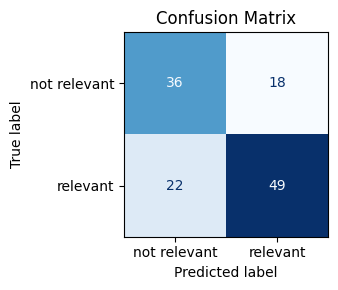

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Confusion Matrix') #put title before to avoid cropping
plt.gcf().set_size_inches(4, 3) 

# Prevent cropping
plt.tight_layout()

#plt.savefig('./img/confusion_relevant_hyperparam.png') # Save the figure before showing
plt.show()

saving model

In [25]:
# Save the best model
model.save('./model/relevant_arch_hyper.h5')

'''model_json = model.to_json()
with open("./model/relevant_arch_ori_n_trafbal.json", "w") as json_file:
    json_file.write(model_json)'''
    
model.save_weights('./model/relevant_weight_hyper.h5')

c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
#run this on kernel
#!tensorflowjs_converter --input_format=keras './model/relevant_hyper.h5' './model/relevant_hyper.json'

'tensorflowjs_converter' is not recognized as an internal or external command,
operable program or batch file.


SVC

In [35]:
X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         55,  778, 3090,   93,   58, 1503,   20,    2,  901,  265,  378,
        901,  854,    7,  766, 1647,   46,  600, 3091,   58,   69,  184,
          0,    0])

In [42]:
X_train.shape

(499, 134)

In [41]:
X_test.shape #num tweet, length

(125, 134)

In [43]:
a = model.predict(X_train)

16/16 [==============================] - 7s 405ms/step


In [44]:
binary_predictions = [[1 if value[0] > 0.5 else 0] for value in a]

In [46]:
binary_predictions.shape

AttributeError: 'list' object has no attribute 'shape'

In [38]:
a.shape

(125, 1)

In [ ]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the objective function for Optuna
def objective(trial):
    
    C = trial.suggest_float('C', 0.1, 100)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])

    # Initialize the SVC model
    svc = SVC(C=C, kernel=kernel)

    # Train the model on X_test and Y_pred
    svc.fit(X_test, Y_pred)

    # Evaluate the model and return the score
    score = svc.score(X_test, Y_test)
    return score

# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Run Optuna optimization
study.optimize(objective, n_trials=100)

# Get the best hyperparameters and score
best_params = study.best_params
best_score = study.best_value

# Create the SVC model with the best hyperparameters
svc = SVC(**best_params)

# Train the model on X_test and Y_pred
svc.fit(X_test, Y_pred)

# Save the best model
# Replace 'model.pkl' with your desired file name
svc.save('model.pkl')

## dont bother 🏖️😒👌
